In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.compose import ColumnTransformer

In [20]:
df = pd.read_csv('titanic.csv',usecols=['Age','Fare','Survived'])
df

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
...,...,...,...
886,0,27.0,13.0000
887,1,19.0,30.0000
888,0,NaN,23.4500
889,1,26.0,30.0000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Age       714 non-null    float64
 2   Fare      891 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 21.0 KB


In [10]:
df.describe()

,Survived,Age,Fare
count,891.000000,714.000000,891.000000
mean,0.383838,29.699118,32.204208
std,0.486592,14.526497,49.693429
min,0.000000,0.420000,0.000000
25%,0.000000,20.125000,7.910400
50%,0.000000,28.000000,14.454200
75%,1.000000,38.000000,31.000000
max,1.000000,80.000000,512.329200


In [11]:
df.dropna(inplace=True)

In [13]:
X =df.iloc[:,1:] 
y =df.iloc[:,0]

In [14]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [16]:
clf = LogisticRegression()

In [18]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

In [19]:
accuracy_score(y_test,y_pred)

0.641860465116279

In [21]:
 np.mean(cross_val_score(LogisticRegression(),X,y,cv=10,scoring='accuracy'))

0.6554577464788732

In [27]:
kbin_age = KBinsDiscretizer(n_bins=10,encode='ordinal',strategy='quantile')
kbin_fare = KBinsDiscretizer(n_bins=10,encode='ordinal',strategy='quantile')

In [28]:
trf = ColumnTransformer([('first',kbin_age,[0]),
                        ('Second',kbin_fare,[1])
                        ])

In [29]:
X_train_trf =trf.fit_transform(X_train)
X_test_trf = trf.transform(X_test)

In [30]:
trf.named_transformers_['first'].n_bins_


array([10])

In [31]:
trf.named_transformers_['first'].bin_edges_

array([array([ 0.67, 14.  , 19.  , 22.  , 25.  , 29.  , 32.  , 36.  , 42.  ,
              50.  , 80.  ])                                                ],
      dtype=object)

In [32]:
trf.named_transformers_['Second'].bin_edges_

array([array([  0.     ,   7.75   ,   7.8958 ,   9.09   ,  13.     ,  15.9    ,
               26.     ,  30.     ,  52.     ,  83.22164, 263.     ])          ],
      dtype=object)

In [34]:
output = pd.DataFrame({'age':X_train['Age'],
                      'age_trf':X_train_trf[:,0],
                      'fare' :X_train['Fare'],
                      'fare_trf':X_train_trf[:,1]
                      })

In [35]:
pd.cut(np.array([1,7,5,4,6,3]),3)

[(0.994, 3.0], (5.0, 7.0], (3.0, 5.0], (3.0, 5.0], (5.0, 7.0], (0.994, 3.0]]
Categories (3, interval[float64, right]): [(0.994, 3.0] < (3.0, 5.0] < (5.0, 7.0]]

In [37]:
output['age_label']=pd.cut(x=X_train['Age'],bins=trf.named_transformers_['first'].bin_edges_[0].tolist())
output['Fare_label']=pd.cut(x=X_train['Fare'],bins=trf.named_transformers_['Second'].bin_edges_[0].tolist())

In [38]:
output.sample(3)

,age,age_trf,fare,fare_trf,age_label,Fare_label
318,31.0,5.0,164.8667,9.0,"(29.0, 32.0]","(83.222, 263.0]"
25,38.0,7.0,31.3875,7.0,"(36.0, 42.0]","(30.0, 52.0]"
220,16.0,1.0,8.0500,2.0,"(14.0, 19.0]","(7.896, 9.09]"


In [42]:
clf =LogisticRegression()
clf.fit(X_train_trf,y_train)
y_pred2 = clf.predict(X_test_trf)

In [44]:
accuracy_score(y_test,y_pred2)

0.6651162790697674

In [45]:
X_trf =trf.fit_transform(X)
np.mean(cross_val_score(LogisticRegression(),X,y,cv=10,scoring='accuracy'))

0.6554577464788732

In [49]:
def discretize(bins,strategy):
    kbin_age = KBinsDiscretizer(n_bins =bins,encode='ordinal',strategy=strategy)
    kbin_Fare= KBinsDiscretizer(n_bins =bins,encode='ordinal',strategy=strategy)
    
    trf =ColumnTransformer([('first',kbin_age,[0]),
                           ('Second',kbin_Fare,[1])])
    
    X_trf =trf.fit_transform(X)
    print(np.mean(cross_val_score(LogisticRegression(),X,y,cv=10,scoring='accuracy')))

    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(X['Age'])
    plt.title('Before')
    
    plt.subplot(122)
    plt.hist(X_trf[:,0],color='red')
    plt.title('After')
    
    plt.show()

0.6554577464788732


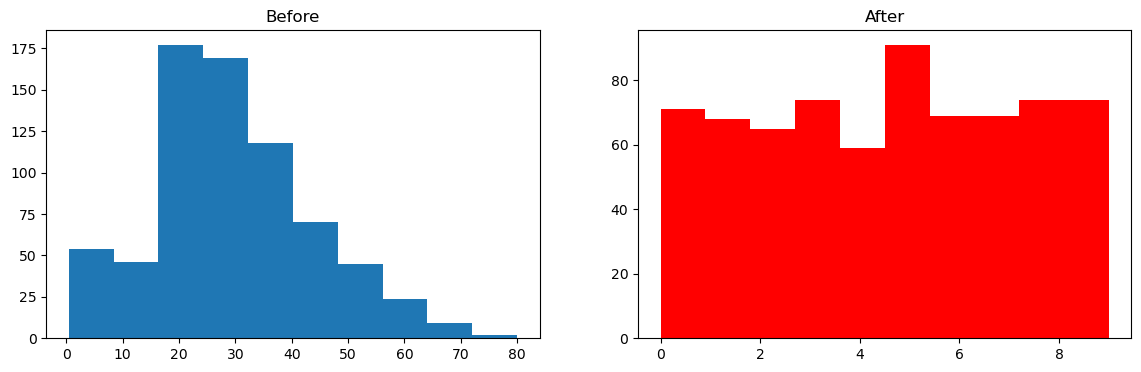

In [50]:
discretize(10,'quantile')

In [73]:
import pandas as pd
import numpy as np

In [74]:
df =pd.read_csv('titanic.csv',usecols=['Age','Fare','Survived','SibSp','Parch'])

In [75]:
df.head(1)

,Survived,Age,SibSp,Parch,Fare
0,0,22.0,1,0,7.25


In [76]:
df.dropna(inplace=True)

In [82]:
df['Family']=df['SibSp'] + df['Parch']

In [83]:
X=df.drop(columns ='Survived')
y =df['Survived']

In [84]:
#df.dropna(columns=['SibSp','Parch'],inplace=True)

In [85]:
X_train,X_test,y_train,X_test =train_test_split(X,y,test_size=0.2,random_state=42)

clf =LogisticRegression()
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
accuracy

In [88]:
np.mean(cross_val_score(LogisticRegression(),X,y,cv=10,scoring='accuracy'))

0.6821009389671362

In [89]:
from sklearn.preprocessing import Binarizer


In [91]:
trf = ColumnTransformer([('bin',Binarizer(copy=False),['family'])],remainder ='passthrough')

X_train_trf = trf.fit_transform(X_train)
X_test_trf= trf.transform(X_test)

X_trf =trf.fit_transform(X)
np.mean(cross_val_score(DecisionTreeClassifier(),X,y,cv=10,scoring='accuracy'))